In [95]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import pandas as pd

In [96]:
# create a colormap with transparency
cmap_orig = plt.get_cmap('Reds')
cmap = cmap_orig(np.arange(cmap_orig.N))
cmap[:, -1] = np.linspace(0, 1, 256)
cmap = ListedColormap(cmap)

In [104]:
image = np.array(Image.open('../data/Test_Set_Merged/c2021_40128237_075_Clip.tif'))
true = np.array(Image.open('../data/Test_Set_Merged/Invasives_PolygonToRaster.tif'))
pred = np.array(Image.open('../data/Test_Set_Merged/Test_126.tif'))*255

Text(0.5, 1.0, 'Predicted Mask')

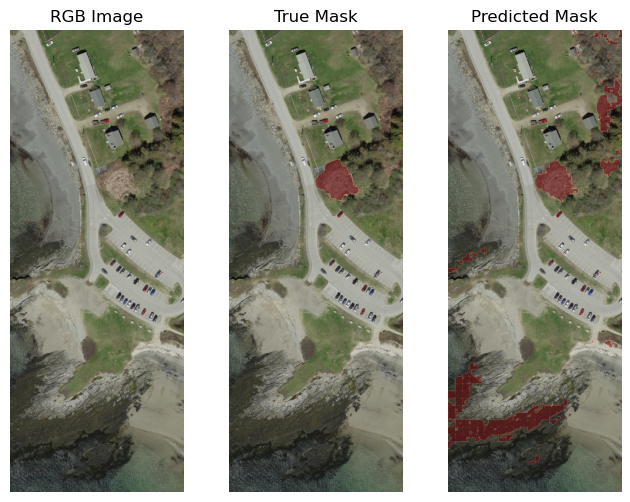

In [105]:
fig, axs = plt.subplots(1,3, figsize=(8,6))
for ax in axs:
    ax.axis('off')
    ax.imshow(image[:,:,:3])

axs[0].set_title("RGB Image")
axs[1].imshow(true, alpha=0.5, cmap=cmap)
axs[1].set_title("True Mask")
axs[2].imshow(pred, alpha=0.5, cmap=cmap)
axs[2].set_title("Predicted Mask")


In [99]:
labels = ['Absent', 'Present']

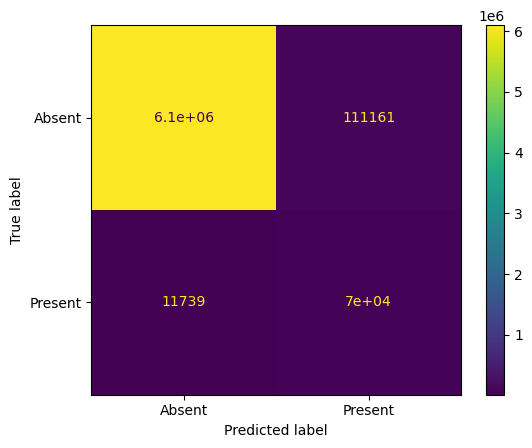

In [100]:
cm = confusion_matrix(true.ravel(), pred.ravel())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Absent', 'Present'])
disp.plot()

Text(0.5, 1.0, 'Normalized Confusion Matrix')

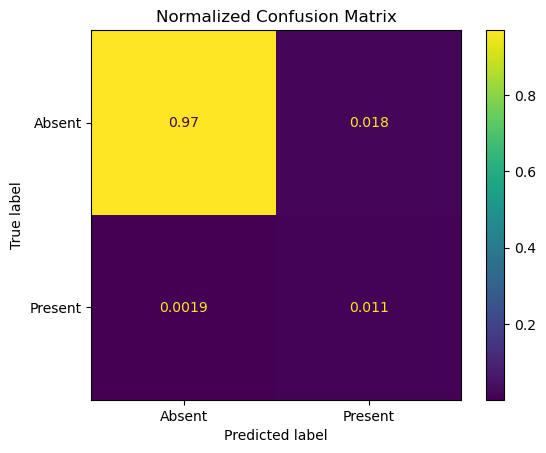

In [101]:
cm = confusion_matrix(true.ravel(), pred.ravel(), normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Absent', 'Present'])
disp.plot()
disp.ax_.set_title("Normalized Confusion Matrix")


In [102]:
report = classification_report(true.ravel(), pred.ravel(), target_names=labels, output_dict=True)
df = pd.DataFrame(report).transpose()
df

,precision,recall,f1-score,support
Absent,0.998079,0.982098,0.990024,6.209478e+06
Present,0.387205,0.856803,0.533370,8.197800e+04
accuracy,0.980466,0.980466,0.980466,9.804656e-01
macro avg,0.692642,0.919451,0.761697,6.291456e+06
weighted avg,0.990119,0.980466,0.984074,6.291456e+06


In [103]:
df.to_latex('classification_report.tex')